In [1]:
pwd

'd:\\Fraud-detection\\research'

In [2]:
import os
os.chdir('D:\Fraud-detection')

In [3]:
pwd

'D:\\Fraud-detection'

In [4]:
data = r'artifacts\data\fraud.csv'

In [5]:
import pandas as pd

df = pd.read_csv(data)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.shape

(284807, 31)

In [10]:
df.duplicated().sum()

1081

DATASET INFORMATION

Due to confidentiality issues, they cannot provide the original features and more background information about the data from V1-V8.
- 'Time': contains the seconds elapsed between each transaction and the first transaction in the dataset.
- 'Amount': is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
- 'Class': is the response variable and it takes value 1 in case of fraud and 0 otherwise


DATA CHECKING

- Check missing values
- Check data type
- Check the number of unique values of target column

In [32]:
#Check missing values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [34]:
#Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [24]:
# Check number of values in target column
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [17]:
df = df.drop_duplicates()

In [33]:
df.duplicated().sum()

1081

In [19]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [36]:
# Check the statistics of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Distribution of the Classes in the original dataset
0    0.998273
1    0.001727
Name: Class, dtype: float64


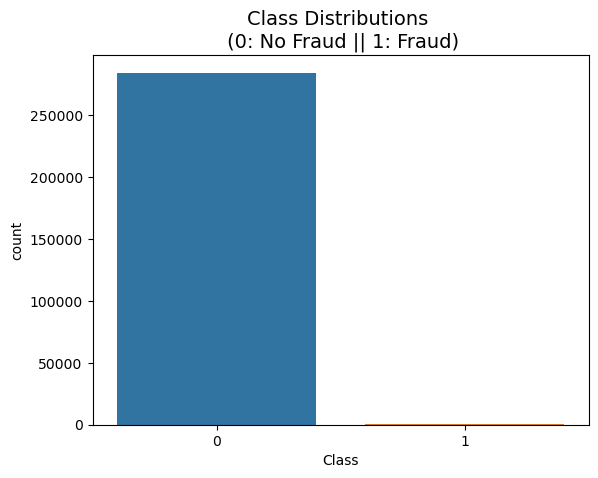

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='Class')
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

print('Distribution of the Classes in the original dataset')
print(df['Class'].value_counts()/len(df))

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from timeit import default_timer as timer
from sklearn.model_selection import train_test_split

# RobustScaler is less prone to outliers

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:1000]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)


def evaluate_model(true, predicted):
    f1score = f1_score(true, predicted)
    recallscore = recall_score(true, predicted)
    precisionscore = precision_score(true, predicted)
    return f1score, recallscore, precisionscore




models = {
    'SVM': SVC(),
    "Random Forest": RandomForestClassifier(),
    "Neural Net":MLPClassifier(),
    "AdaBoost":AdaBoostClassifier(),
}

X = new_df.drop(['Class'], axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
model_list = []
recall_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    start_time = timer()
    model.fit(X_train, y_train) # Train model
    end_time = timer()
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    # Evaluate Train and Test dataset
    f1score_train , recallscore_train, precisionscore_train = evaluate_model(y_train, y_train_pred)
    f1score_test , recallscore_test, precisionscore_test = evaluate_model(y_test, y_test_pred)


    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- F1 score on training set: {:.4f}".format(f1score_train))
    print("- Recall score on training set: {:.4f}".format(recallscore_train))
    print("- Precision score on training set: {:.4f}".format(precisionscore_train))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- F1 score on testing set: {:.4f}".format(f1score_test))
    print("- Recall score on testing set: {:.4f}".format(recallscore_test))
    print("- Precision score on testing set: {:.4f}".format(precisionscore_test))
    print('----------------------------------')
    print(f"Total training time: {end_time-start_time:.3f} seconds")
    
    recall_list.append(recallscore_test)
    print('='*35)
    print('\n')

Model performance for Training set
- F1 score on training set: 0.9337
- Recall score on training set: 0.8780
- Precision score on training set: 0.9969
----------------------------------
Model performance for Test set
- F1 score on testing set: 0.8978
- Recall score on testing set: 0.8211
- Precision score on testing set: 0.9902
----------------------------------
Total training time: 0.016 seconds


Model performance for Training set
- F1 score on training set: 1.0000
- Recall score on training set: 1.0000
- Precision score on training set: 1.0000
----------------------------------
Model performance for Test set
- F1 score on testing set: 0.9170
- Recall score on testing set: 0.8537
- Precision score on testing set: 0.9906
----------------------------------
Total training time: 0.941 seconds




c:\Users\PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model performance for Training set
- F1 score on training set: 0.9918
- Recall score on training set: 0.9837
- Precision score on training set: 1.0000
----------------------------------
Model performance for Test set
- F1 score on testing set: 0.9231
- Recall score on testing set: 0.8780
- Precision score on testing set: 0.9730
----------------------------------
Total training time: 0.721 seconds


Model performance for Training set
- F1 score on training set: 0.9751
- Recall score on training set: 0.9566
- Precision score on training set: 0.9944
----------------------------------
Model performance for Test set
- F1 score on testing set: 0.9106
- Recall score on testing set: 0.8699
- Precision score on testing set: 0.9554
----------------------------------
Total training time: 0.581 seconds




Distribution of the Classes in the subsample dataset
0    0.910415
1    0.089585
Name: Class, dtype: float64


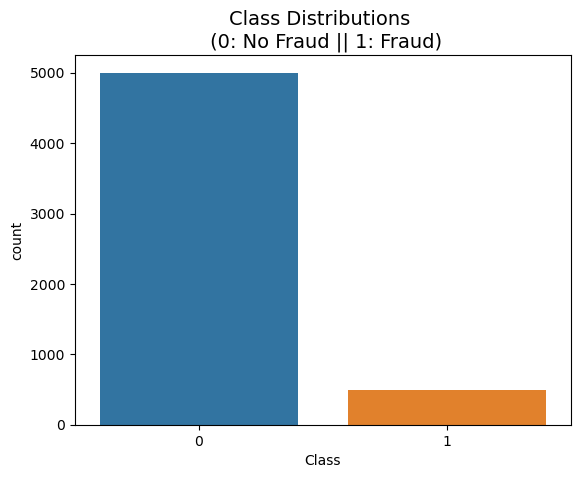

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=new_df, x='Class')
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)


print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

In [23]:
corr_matrix = new_df.corr()
corr_matrix['Class'].sort_values(ascending=False)

Class            1.000000
V4               0.717682
V11              0.688465
V2               0.494632
V19              0.253437
V20              0.189324
V21              0.113629
V28              0.093799
V27              0.089640
V8               0.067721
scaled_amount    0.049395
V26              0.032751
V25              0.013788
V22              0.007808
V23             -0.023816
V15             -0.055414
V13             -0.066885
V24             -0.109043
scaled_time     -0.129012
V5              -0.359944
V6              -0.397869
V1              -0.437526
V18             -0.468258
V7              -0.472914
V17             -0.559684
V9              -0.563274
V3              -0.571264
V16             -0.596728
V10             -0.624363
V12             -0.681908
V14             -0.749571
Name: Class, dtype: float64

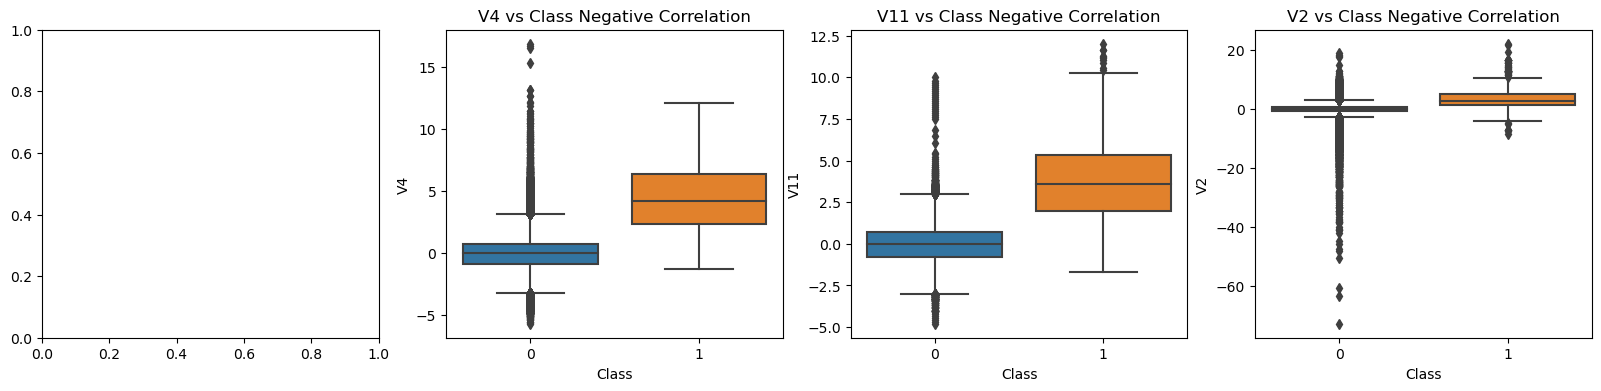

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)

sns.boxplot(x="Class", y="V4", data=df, ax=axes[1])
axes[1].set_title('V4 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V11", data=df, ax=axes[2])
axes[2].set_title('V11 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V2", data=df, ax=axes[3])
axes[3].set_title('V2 vs Class Negative Correlation')

plt.show()

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
import os
os.chdir(r'D:\Fraud-detection')



negative_corr_column = ['V14', 'V12', 'V10']

for col in negative_corr_column:
    col_fraud = new_df[col].loc[new_df['Class'] == 1].values
    quantile_25 = new_df[col].loc[new_df['Class'] == 1].quantile(0.25)
    quantile_75 = new_df[col].loc[new_df['Class'] == 1].quantile(0.75)
    iqr = quantile_75 - quantile_25
    lower_limit = quantile_25 - iqr*1.5
    upper_limit = quantile_75 + iqr*1.5
    outliers = [x for x in col_fraud if x < lower_limit or x > upper_limit]
    print(f'Feature {col} Outliers for Fraud Cases: {len(outliers)}')
    new_train_df = new_df.drop(new_df[(new_df[col] > upper_limit) | (new_df[col] < lower_limit)].index)
    new_df = new_train_df

input_feature_train_df= new_df.drop(columns=['Class'],axis=1)
target_feature_train_df= new_df['Class']
from imblearn.combine import SMOTEENN
# Random Over Sampling the dataset because of its imbalance
smt = SMOTEENN()
X_train_sampling, y_train_sampling = smt.fit_resample(input_feature_train_df, target_feature_train_df)


train_arr = np.c_[X_train_sampling, np.array(y_train_sampling)]
print(train_arr.shape)


Feature V14 Outliers for Fraud Cases: 5
Feature V12 Outliers for Fraud Cases: 12
Feature V10 Outliers for Fraud Cases: 28
(9668, 31)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_7192\3538466111.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
C:\Users\PC\AppData\Local\Temp\ipykernel_7192\3538466111.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v12_fraud_dist,ax=ax2, fit=

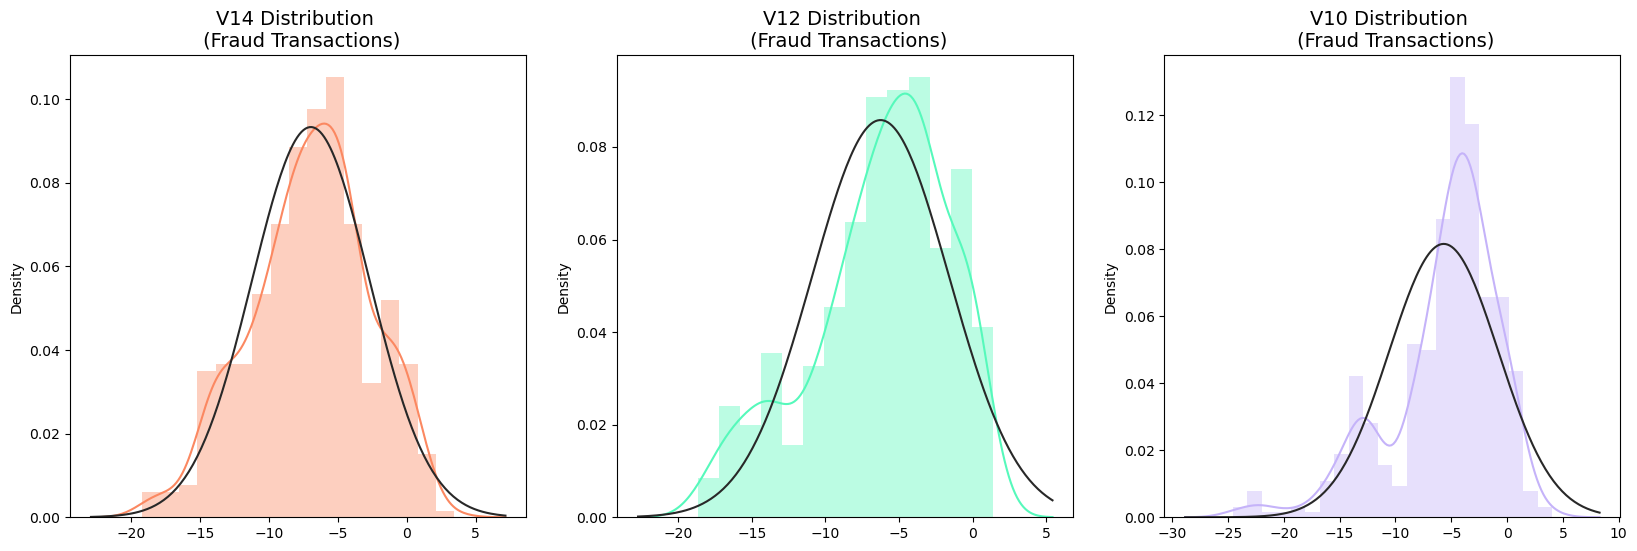

In [24]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V4'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [14]:
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import train_test_split

X = new_df.drop(columns=['Class'], axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

counter = Counter(y_train)
print(f'Befor: {counter}')
smt = SMOTEENN()

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
counter_1 = Counter(y_train_sm)
print(f'After: {counter_1}')


Befor: Counter({0: 3726, 1: 309})
After: Counter({1: 3716, 0: 3498})


In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, recall_score, precision_score
from timeit import default_timer as timer

def evaluate_model(true, predicted):
    f1score = f1_score(true, predicted)
    recallscore = recall_score(true, predicted)
    precisionscore = precision_score(true, predicted)
    return f1score, recallscore, precisionscore


models = {
    'SVM': SVC(),
    "Gaussian Process":GaussianProcessClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Neural Net":MLPClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "QDA":QuadraticDiscriminantAnalysis(),
    "XGB":XGBClassifier()
}

model_list = []
recall_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    start_time = timer()
    model.fit(X_train_sm, y_train_sm) # Train model
    # Make predictions
    y_train_pred = model.predict(X_train_sm)
    y_test_pred = model.predict(X_test)
    end_time = timer()

    # Evaluate Train and Test dataset
    f1score_train , recallscore_train, precisionscore_train = evaluate_model(y_train, y_train_pred)

    f1score_test , recallscore_test, precisionscore_test = evaluate_model(y_test, y_test_pred)

    
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- F1 score on training set: {:.4f}".format(f1score_train))
    print("- Recall score on training set: {:.4f}".format(recallscore_train))
    print("- Precision score on training set: {:.4f}".format(precisionscore_train))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- F1 score on testing set: {:.4f}".format(f1score_test))
    print("- Recall score on testing set: {:.4f}".format(recallscore_test))
    print("- Precision score on testing set: {:.4f}".format(precisionscore_test))
    print('----------------------------------')
    print(f"Total training time: {end_time-start_time:.3f} seconds")
    
    recall_list.append(recallscore_test)
    print('='*35)
    print('\n')

In [57]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV
import numpy as np


train_arr = np.load(r'artifacts\preprocess\train_array.npy')
test_arr = np.load(r'artifacts\preprocess\test_array.npy')

X_train,y_train,X_test,y_test= (train_arr[:,:-1], train_arr[:,-1], test_arr[:,:-1], test_arr[:,-1])

#Model selection
models = {
"Random Forest": RandomForestClassifier(),
"AdaBoost": AdaBoostClassifier(),
"XGBClassifier": XGBClassifier(),
}

#Hyperparameter selection
params={
"Random Forest":{
    'n_estimators': [100, 200],
},
"XGBClassifier":{
    'learning_rate': [0.1, 0.01],
},
"AdaBoost":{
    'learning_rate':[1, 0.1],
}
}

#Evaluation
report = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    param= params[list(models.keys())[i]]
    gs = GridSearchCV(model, param, cv=2)
    gs.fit(X_train,y_train)

    model.set_params(**gs.best_params_)
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_report = classification_report(y_train, y_train_pred)
    print(type(train_report))
    test_report = classification_report(y_test, y_test_pred)

    test_score = f1_score(y_test, y_test_pred)
    report[list(models.keys())[i]] = test_score

## To get best model score from dict
best_model_score = max(sorted(report.values()))

## To get best model name from dict

best_model_name = list(report.keys())[list(report.values()).index(best_model_score)]
best_model = models[best_model_name]

if best_model_score<0.8:
    print('No model !')

KeyboardInterrupt: 